### Task-1: Downloading the dataset

### Task-2: Loading the dataset

In [ ]:
import pandas as pd

dataset = pd.read_csv('/content/House Price India.csv')

print("House Price India Dataset is loaded successfully.")

House Price India Dataset is loaded successfully.


### Task-3: Perform the Below Visualizations for that dataset

1.   Univariate Analysis
2.   Bi - Variate Analysis
3.   Multivariate Analysis





1. **Univariate Analysis:**

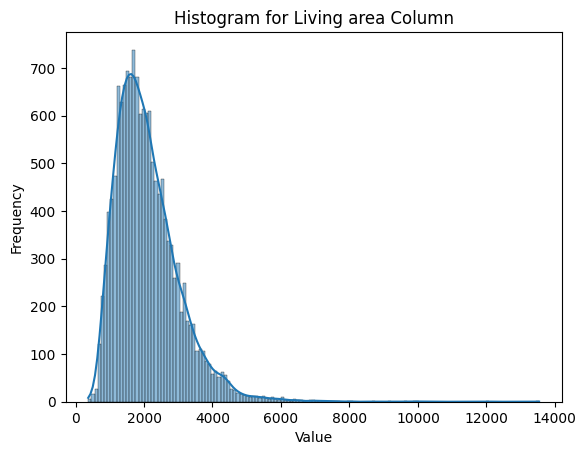

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(dataset['living area'], kde=True)
plt.title('Histogram for Living area Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

2. **Bi-Variate Analysis:**

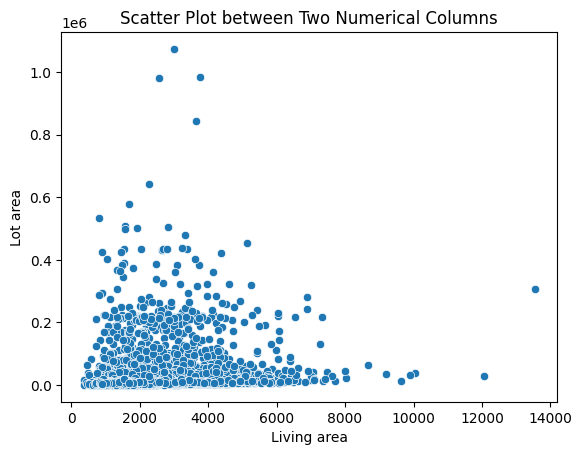

In [ ]:
sns.scatterplot(data=dataset, x='living area', y='lot area')
plt.title('Scatter Plot between Two Numerical Columns')
plt.xlabel('Living area')
plt.ylabel('Lot area')
plt.show()

3. **Multi-Variate Analysis**

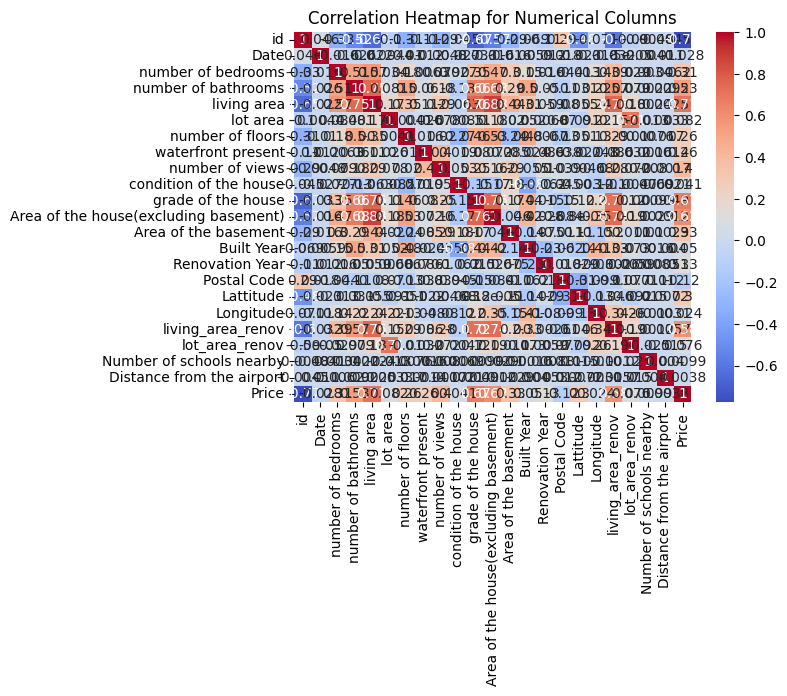

In [ ]:
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

Multi-variate Analysis using Pairplot:

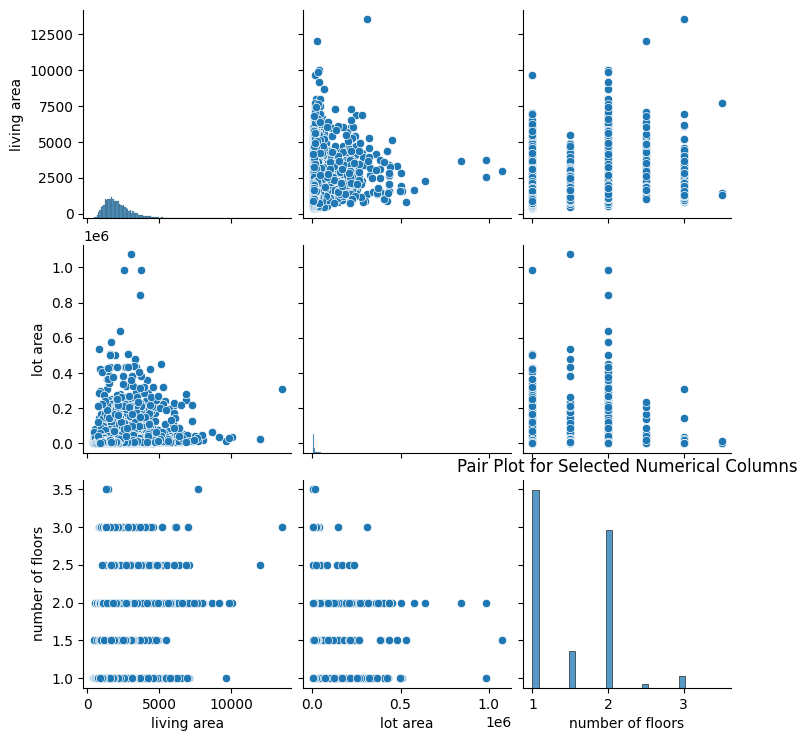

In [ ]:
sns.pairplot(dataset[['living area', 'lot area', 'number of floors']])
plt.title('Pair Plot for Selected Numerical Columns')
plt.show()


### Task-4: Perform descriptive statistics on the dataset

In [ ]:
numerical_stats = dataset.describe()

print("Descriptive Statistics for Numerical Columns:")
print(numerical_stats)


Descriptive Statistics for Numerical Columns:
                 id          Date  number of bedrooms  number of bathrooms  \
count  1.462000e+04  14620.000000        14620.000000         14620.000000   
mean   6.762821e+09  42604.538646            3.379343             2.129583   
std    6.237575e+03     67.347991            0.938719             0.769934   
min    6.762810e+09  42491.000000            1.000000             0.500000   
25%    6.762815e+09  42546.000000            3.000000             1.750000   
50%    6.762821e+09  42600.000000            3.000000             2.250000   
75%    6.762826e+09  42662.000000            4.000000             2.500000   
max    6.762832e+09  42734.000000           33.000000             8.000000   

        living area      lot area  number of floors  waterfront present  \
count  14620.000000  1.462000e+04      14620.000000        14620.000000   
mean    2098.262996  1.509328e+04          1.502360            0.007661   
std      928.275721  3.791

### Task-5: Handling the missing values:

In [ ]:
missing_values = dataset.isna().sum()
print("Missing Values per Column:")
print(missing_values)

# Remove rows with missing values
dataset_cleaned = dataset.dropna()

# Impute missing values for numerical columns with mean
numerical_columns = dataset.select_dtypes(include='number')
for column in numerical_columns:
    dataset[column].fillna(dataset[column].mean(), inplace=True)

# Impute missing values for categorical columns with mode
categorical_columns = dataset.select_dtypes(include='object')
for column in categorical_columns:
    dataset[column].fillna(dataset[column].mode()[0], inplace=True)

# Mark missing values in a categorical column with 'Missing'
dataset['living area'].fillna('Missing', inplace=True)

# Drop columns with too many missing values
threshold = len(dataset) * 0.2
dataset.dropna(axis=1, thresh=threshold, inplace=True)

# Interpolate missing values for a numerical column
dataset['living area'].interpolate(method='linear', inplace=True)

# Display the cleaned dataset
print("Cleaned Dataset:")
print(dataset.head())

Missing Values per Column:
id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                      